In [1]:
# 데이터 분석 패키지
import numpy as np
import pandas as pd

In [2]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 50)  # None으로 설정하면 모든 행 출력

In [3]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# matplotlib 한글지원 패키지
import koreanize_matplotlib

In [5]:
# 종목정보파일 데이터 프레임으로 가져오기
df_stocks = pd.read_csv('stocks.csv')

In [6]:
df_stocks.shape

(2855, 23)

In [7]:
df_stocks.head(1)

,Code,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,005930,삼성전자,KOSPI,NaN,53900,1,500,0.94,54500,54500,53700,6965539,377240465300,321771279445000,5969782550,STK,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(...",1975-06-11,12월,한종희,http://www.samsung.com/sec,경기도


In [8]:
stocks_columns = {'Code':'종목코드', 'Name':'종목명', 'Market':'시장', 'Dept':'부서(한국거래소)', 'Close':'종가', 'ChangeCode':'등락기호','Changes':'전일대비', 
                     'ChagesRatio':'전일대비 등락률', 'Open':'시가','High':'고가', 'Low':'저가', 'Volume':'거래량', 'Amount':'거래대금', 'Marcap':'시가총액', 
                     'Stocks':'주식발행수', 'MarketId':'시장기호', 'Sector':'업종', 'Industry':'주요제품', 'ListingDate':'상장일', 
                     'SettleMonth':'결산월', 'Representative':'대표자명','HomePage':'홈페이지', 'Region':'지역'} 
# 컬럼명 변경
# inplace 매개변수 : 데이터프레임 원본을 수정하려면 True, 복사본을 반환받으려면 False
df_stocks.rename(columns = stocks_columns, inplace = True)

In [9]:
df_stocks.head(1)

,종목코드,종목명,시장,부서(한국거래소),종가,등락기호,전일대비,전일대비 등락률,시가,고가,저가,거래량,거래대금,시가총액,주식발행수,시장기호,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,005930,삼성전자,KOSPI,NaN,53900,1,500,0.94,54500,54500,53700,6965539,377240465300,321771279445000,5969782550,STK,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(...",1975-06-11,12월,한종희,http://www.samsung.com/sec,경기도


#### 문제

1. 서울 특별시 소재지를 두고 있는 KOSPI 종목의 종목명과 업종명 가져오기

In [14]:
# 컬럼(column)=변수(varaible)=피처(feature)
# 변수에서 중복되지 않은값 가져오기
df_stocks['지역'].unique()

array(['경기도', '서울특별시', '인천광역시', nan, '경상북도', '제주특별자치도', '울산광역시', '대전광역시',
       '전라남도', '충청북도', '경상남도', '세종특별자치시', '부산광역시', '충청남도', '강원특별자치도',
       '대구광역시', '전북특별자치도', '미국', '광주광역시', '싱가포르', '케이맨 제도', '홍콩', '일본'],
      dtype=object)

In [15]:
df_stocks['시장'].unique()

array(['KOSPI', 'KOSDAQ GLOBAL', 'KOSDAQ', 'KONEX'], dtype=object)

In [16]:
df_stocks['시장기호'].unique()

array(['STK', 'KSQ', 'KNX'], dtype=object)

In [ ]:
#case1)
cond1 = df_stocks['지역'] == '서울특별시'
cond2 = df_stocks['시장'] == 'KOSPI'
df_stocks[ cond1 & cond2 ]

#case2)
df_stocks[ (df_stocks['지역'] == '서울특별시') & (df_stocks['시장'] == 'KOSPI') ]

2. 2024년에 상장한 종목의 종목명,업종,시가총액,주식발행수 가져오기

In [38]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855 entries, 0 to 2854
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   종목코드       2855 non-null   object 
 1   종목명        2855 non-null   object 
 2   시장         2855 non-null   object 
 3   부서(한국거래소)  1896 non-null   object 
 4   종가         2855 non-null   int64  
 5   등락기호       2855 non-null   int64  
 6   전일대비       2855 non-null   int64  
 7   전일대비 등락률   2855 non-null   float64
 8   시가         2855 non-null   int64  
 9   고가         2855 non-null   int64  
 10  저가         2855 non-null   int64  
 11  거래량        2855 non-null   int64  
 12  거래대금       2855 non-null   int64  
 13  시가총액       2855 non-null   int64  
 14  주식발행수      2855 non-null   int64  
 15  시장기호       2855 non-null   object 
 16  업종         2739 non-null   object 
 17  주요제품       2724 non-null   object 
 18  상장일        2739 non-null   object 
 19  결산월        2739 non-null   object 
 20  대표자명    

In [20]:
#case1) '-'를 구분자로하여 년도만 추출
day = '2024-12-09'
day.split('-')[0]  # ['2024','12','09']

df_stocks['상장년도'] = df_stocks['상장일'].str.split('-').str[0]
df_stocks.head(2)

,종목코드,종목명,시장,부서(한국거래소),종가,등락기호,전일대비,전일대비 등락률,시가,고가,저가,거래량,거래대금,시가총액,주식발행수,시장기호,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역,상장년도
0,005930,삼성전자,KOSPI,NaN,53900,1,500,0.94,54500,54500,53700,6965539,377240465300,321771279445000,5969782550,STK,통신 및 방송 장비 제조업,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(...",1975-06-11,12월,한종희,http://www.samsung.com/sec,경기도,1975
1,000660,SK하이닉스,KOSPI,NaN,168500,2,-400,-0.24,168000,170100,167600,843956,142367747900,122668398502500,728002365,STK,반도체 제조업,"반도체,컴퓨터,통신기기 제조,도매",1996-12-26,12월,곽노정,http://www.skhynix.com,경기도,1996


In [ ]:
#case2) 문자열로 표현된 날짜를 날짜 타입으로 변경후 년도만 추출
# 문자열을 날짜 형식으로 변환
df_stocks['상장일'] = pd.to_datetime(df_stocks['상장일'])
# df_stocks['상장일'].dtype
df_stocks['상장년도2'] = df_stocks['상장일'].dt.year
# df_stocks['상장일'].dt.month
# df_stocks['상장일'].dt.day
df_stocks.head(1)
df_stocks.info()

In [ ]:
dir(df_stocks['상장일'].dt)

In [26]:
len(df_stocks[df_stocks['상장년도'] == '2024'][['종목명','업종','시가총액','주식발행수']])
df_stocks[df_stocks['상장년도'] == '2024'][['종목명','업종','시가총액','주식발행수']].head(2)

,종목명,업종,시가총액,주식발행수
61,HD현대마린솔루션,"건축기술, 엔지니어링 및 관련 기술 서비스업",5716270000000,44450000
99,엘앤에프,일차전지 및 이차전지 제조업,3502596617000,36296338


In [27]:
len(df_stocks[df_stocks['상장년도2'] == 2024][['종목명','업종','시가총액','주식발행수']])
df_stocks[df_stocks['상장년도2'] == 2024][['종목명','업종','시가총액','주식발행수']].head(2)

,종목명,업종,시가총액,주식발행수
61,HD현대마린솔루션,"건축기술, 엔지니어링 및 관련 기술 서비스업",5716270000000,44450000
99,엘앤에프,일차전지 및 이차전지 제조업,3502596617000,36296338


3. 상장 년도별 종목 빈도수

In [28]:
# case1)
df_stocks['상장년도'].value_counts().to_frame().reset_index()

,상장년도,count
0,2023,160
1,2024,131
2,2022,124
3,2015,121
4,2018,112
...,...,...
55,1964,1
56,1966,1
57,1971,1
58,1980,1


In [29]:
# case2)
df_stocks.groupby('상장년도').size()
df_stocks.groupby('상장년도').agg('size')

상장년도
1956      4
1962      1
1964      1
1966      1
1968      6
       ... 
2020     92
2021    111
2022    124
2023    160
2024    131
Length: 60, dtype: int64

In [99]:
df_stocks.query("상장년도 == '2024'").groupby(['상장년도','시장']).agg('size').sort_values(ascending=False)

상장년도  시장    
2024  KOSDAQ    114
      KOSPI      14
      KONEX       3
dtype: int64

#### 빈도수
 1. 컬럼 1개의 빈도수 : df['컬럼명'].value_counts()
 2. 컬럼 2개의 빈도수 : pd.corsstab(df['컬럼명1'],df['컬럼명2'])

In [30]:
df_stocks['시장'].value_counts()

시장
KOSDAQ           1728
KOSPI             959
KONEX             120
KOSDAQ GLOBAL      48
Name: count, dtype: int64

In [31]:
pd.crosstab(df_stocks['시장'],df_stocks['상장년도'])

상장년도,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
시장,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,7,19,14,9,10,11,6,5,14,14,3
KOSDAQ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,4,10,16,34,14,19,36,1,36,76,77,75,34,35,45,36,51,28,45,55,46,16,30,55,78,56,57,83,82,70,78,99,127,114
KOSDAQ GLOBAL,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,2,3,2,4,0,0,1,2,0,0,0,1,1,2,2,7,3,6,0,3,2,2,2,0,0
KOSPI,4,1,1,1,6,5,4,1,3,21,10,30,51,16,10,3,1,1,1,5,8,8,21,50,51,21,11,2,4,16,14,31,16,3,15,4,12,19,15,13,16,20,16,17,18,26,25,10,10,9,17,18,19,19,15,14,26,9,19,14


In [32]:
pd.crosstab(df_stocks['시장'],df_stocks['지역'])

지역,강원특별자치도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,세종특별자치시,싱가포르,울산광역시,인천광역시,일본,전라남도,전북특별자치도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
시장,,,,,,,,,,,,,,,,,,,,,,
KONEX,5,38,2,3,3,3,5,0,1,37,1,0,0,4,0,3,4,0,4,7,0,0
KOSDAQ,18,563,50,44,10,32,47,6,43,639,8,0,12,67,2,13,19,2,75,63,4,8
KOSDAQ GLOBAL,2,19,0,3,0,0,2,0,1,10,1,0,0,0,0,0,1,0,3,6,0,0
KOSPI,4,166,43,23,8,22,8,0,37,422,3,1,17,23,0,8,12,5,26,17,1,0


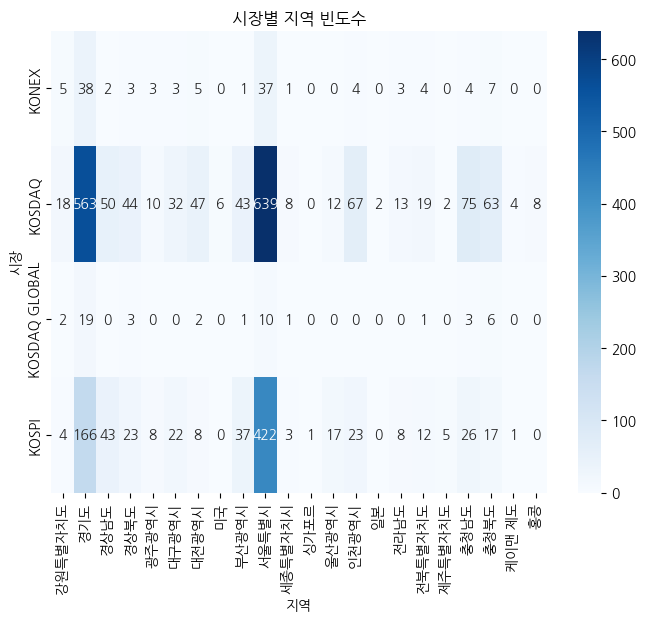

In [118]:
crosstab = pd.crosstab(df_stocks['시장'],df_stocks['지역'])
plt.figure(figsize=(8,6))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('시장별 지역 빈도수')
plt.xlabel('지역')
plt.ylabel('시장')
plt.show()

In [33]:
cond1 = (df_stocks['지역'] == '일본') | (df_stocks['지역'] == '홍콩')
cond2 = df_stocks['시장'] == 'KOSDAQ'
df_stocks[cond1 & cond2][['지역','종목명','홈페이지']].sort_values('지역')

,지역,종목명,홈페이지
776,일본,JTC,http://www.groupjtc.com/korean/
1153,일본,SBI핀테크솔루션즈,http://https://www.sbi-finsol.co.jp/kr/
681,홍콩,GRT,NaN
1182,홍콩,고스트스튜디오,http://www.ghoststudio.net
1336,홍콩,윙입푸드,http://wingyip-food.com
1989,홍콩,헝셩그룹,http://www.hengsheng.co.kr/
2237,홍콩,컬러레이,http://www.coloray.co.kr
2417,홍콩,이스트아시아홀딩스,http://www.qiuzhi.com
2437,홍콩,오가닉티코스메틱,NaN
2567,홍콩,로스웰,NaN
